In [ ]:
!pip install orbit-ml

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [11]:
DATA_FILE = "./data/examples/iclaims_example.csv"
df = pd.read_csv(DATA_FILE, parse_dates=['week'])
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] =\
    df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']].apply(np.log)

test_size=52
train_df=df[:-test_size]
test_df=df[-test_size:]

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


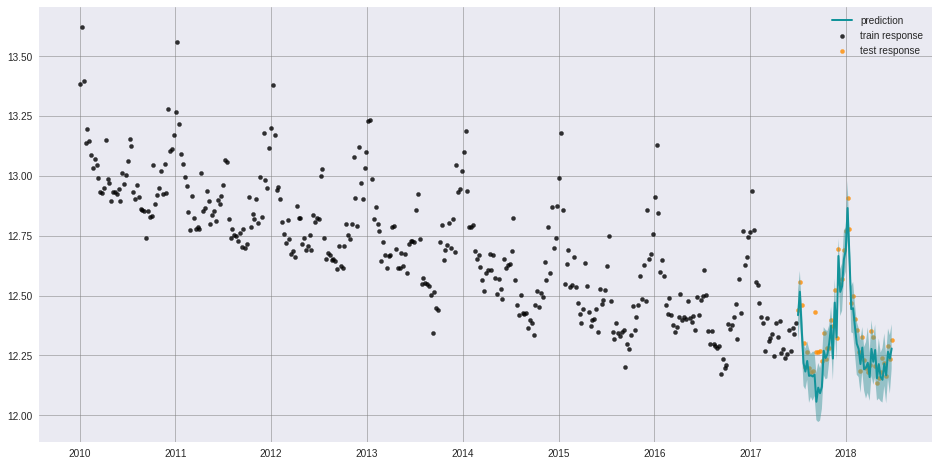

In [12]:
from orbit.models.lgt import LGTFull
from orbit.diagnostics.plot import plot_predicted_data

lgt = LGTFull(
    response_col='claims',
    date_col='week',
    regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
    seasonality=52,
)
lgt.fit(df=train_df)

# predicted df
predicted_df = lgt.predict(df=test_df)

# plot predictions
plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_df
)